Unsupervised learning is a type of machine learning where algorithms analyze unlabeled data to find patterns, structures, or anomalies without predefined outcomes or guidance. The goal is to let the algorithm independently discover relationships and groups in the data.

# Main Tasks of Unsupervised Learning




## **Clustering**


Algorithms automatically group similar data points, revealing natural clusters within the data.

Examples:
* grouping customers by purchasing behavior
* grouping students based on performance patterns
* clustering images by visual similarity


        Algorithm: K-Means
        - Tries to split data into k groups ("clusters") so each point belongs to the group with the nearest mean
        
        1. Choose number of clusters k
        2. Initialize k cluster centers or "centroids" randomly.
        3. Assign each data point to the nearest centroid.
        4. Recompute centroids as the mean of their assigned points.
        5. Repeat steps 3-4 until assignments stop changing.

        Limitations
        1. requires predefined k
        2. sensitive to outliers

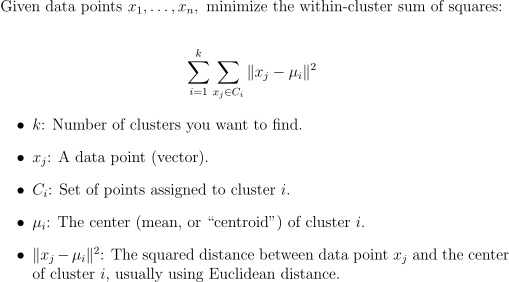

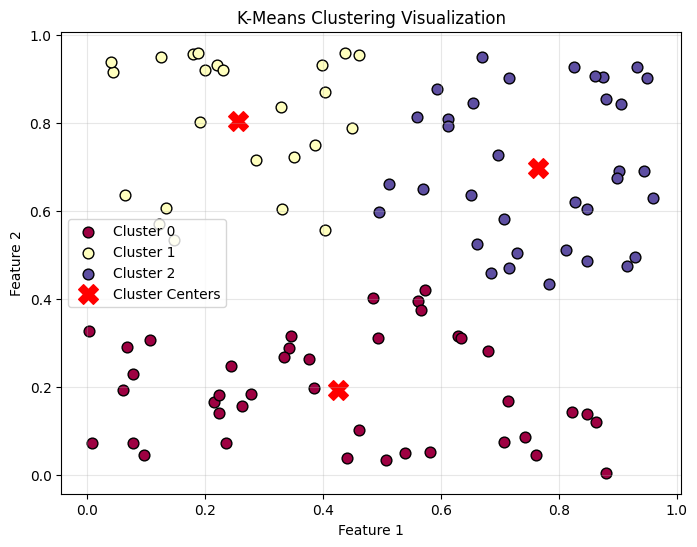

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generate 100 random 2D points (each row is a (x, y) pair, values in [0, 1))
X = np.random.rand(100, 2)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
unique_labels = set(labels)

# Color map: each cluster gets a color
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    lbl = f'Cluster {k}'
    mask = (labels == k)
    plt.scatter(X[mask, 0], X[mask, 1], c=[col], s=60, edgecolors='k', label=lbl)

# Show cluster centers as 'X' marks
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='red', marker='X',
    label='Cluster Centers'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

        Algorithm: Density-Based Spatial Clustering (DBSCAN)
        - Defines clusters based on dense regions of points
        - uses two key parameters:
            - epsilon: maximum distance between two points for them to be considered neighbors
            - minPts: minimum number of points to form a dense region
        
        1. Select an arbitrary, unvisited point
        2. Find all points within epsilon distance (epsilon neighborhood)
        3. Determine if core point or noise
            - if it has atleast minPts neighbors, it is a core point otherwise, start a new cluster
            - if not mark as noise
        4. For each neighbor, it is also a core point, recursively add its neighbors to the cluster
        5. Continue until all points are assigned or maked as noise
        

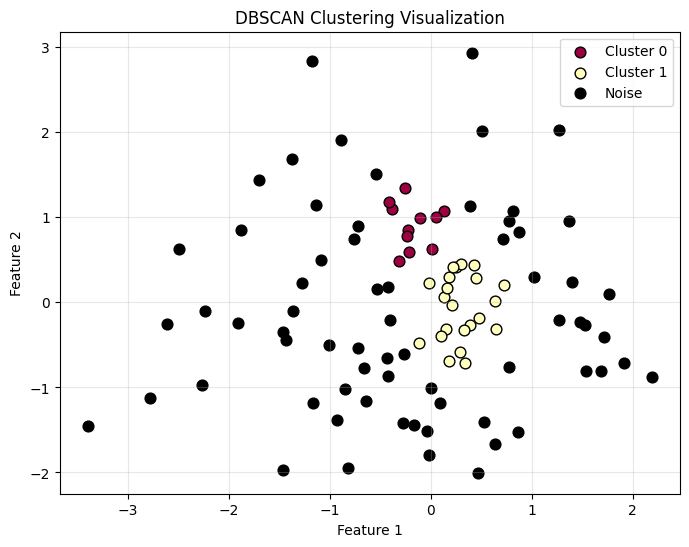

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# uniform distribution
#X = np.random.rand(100, 2)

# normal distribution, mean=0, std=1 per feature
X = np.random.normal(loc=0, scale=1, size=(100, 2))

# Apply DBSCAN with a smaller eps value
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_          # Cluster labels (-1 means noise/outlier)
unique_labels = set(labels)  # Find all cluster labels

# Color map: each cluster gets a color; noise is black
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    # Black for noise
    if k == -1:
        col = [0, 0, 0, 1]
        lbl = 'Noise'
    else:
        lbl = f'Cluster {k}'
    mask = (labels == k)
    plt.scatter(X[mask, 0], X[mask, 1], c=[col], s=60, edgecolors='k', label=lbl)


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("DBSCAN Clustering Visualization")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **Association Rule Mining**


Uncover interesting relationships between features in data or patterns between items in large datasets

It produces "if-then" statements (association rules) that describe how frequently certain items co-occur, for example, "If a customer buys milk and diapers, then they are likely to also buy beer"

Examples:
* market basket analysis ("Customers who buy milk also buy bread")
* recommendation systems
* retail analytics
* website click pattern discovery

Association rules that represent sets of items found together in transactions
* antecedent ("if")
* consequent ("then")


The strength of an association is measured by,
* Support - the proportion of transaction that contain both the antecedent and consequent items
* Confidence - The probability that the consequent appears given the presence of the antecedent
* Lift - Measures how much more likely the consequent is to appear with the antecedent compared to random choice.


        Algorithm: Apriori
        - Find frequent itemsets and association rules from transactional datasets.
        - Apriori uses the Apriori Principle: A frequent itemset must have all of its subsets also frequent.

        1. Generate candidate 1-itemsets (C1)
            Count how often each items appears.
        2. Generate frequent 1-itemsets (L1)
            Keep only items with support ≥ minimum support.
        3. Generate candidate 2-itemsets (C2)
            Combine L1 with itself to create pairs.
        4. Filter to get frequent 2-itemsets (L2)
            Remove pairs with support < min support.
        5. Repeat
            Generate L3, L4…
            Stop when no more frequent itemsets can be created.
        6. Generate Association Rules
            Rules are formed from frequent itemsets and evaluated using confidence and lift.

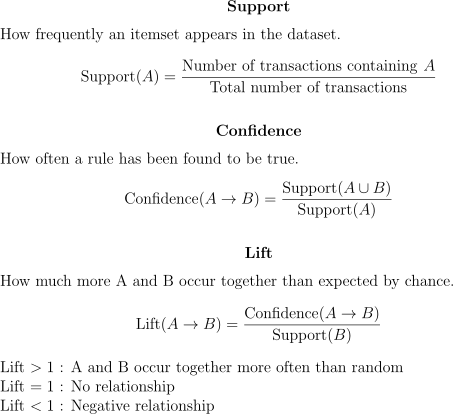





/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Frequent Itemsets:
    support         itemsets
0      0.6           (Milk)
1      0.6          (Bread)
2      0.8         (Diaper)
3      0.4           (Beer)
4      0.4    (Bread, Milk)
5      0.4   (Diaper, Milk)
6      0.4  (Bread, Diaper)
7      0.4   (Beer, Diaper)

Association Rules:
   antecedents consequents  support  confidence      lift
0     (Bread)      (Milk)      0.4    0.666667  1.111111
1      (Milk)     (Bread)      0.4    0.666667  1.111111
2      (Milk)    (Diaper)      0.4    0.666667  0.833333
3     (Bread)    (Diaper)      0.4    0.666667  0.833333
4      (Beer)    (Diaper)      0.4    1.000000  1.250000


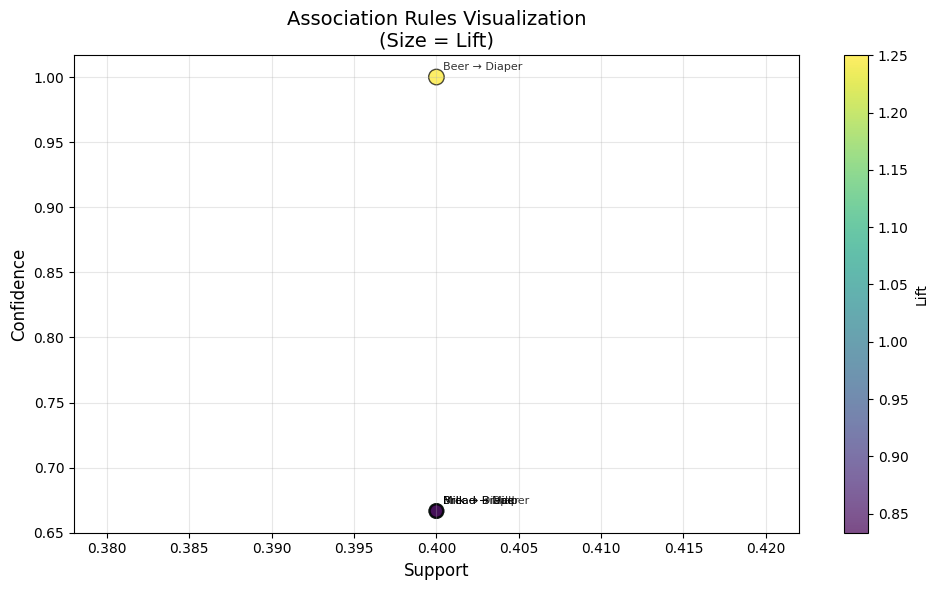

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transactional dataset (one-hot encoded)
df = pd.DataFrame([
    [1, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 1, 1]
], columns=['Milk', 'Bread', 'Diaper', 'Beer'])

# Step 1: Get Frequent Itemsets
frequent_items = apriori(df, min_support=0.40, use_colnames=True)
print("Frequent Itemsets:\n", frequent_items)

# Step 2: Generate Rules
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Step 3: Visualize Association Rules
if len(rules) > 0:
    plt.figure(figsize=(10, 6))

    # Scatter plot: support vs confidence, sized by lift
    scatter = plt.scatter(
        rules['support'],
        rules['confidence'],
        s=rules['lift'] * 100,  # Size represents lift
        c=rules['lift'],        # Color represents lift
        cmap='viridis',
        edgecolors='k',
        alpha=0.7
    )

    # Add labels for each rule
    for idx, row in rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        plt.annotate(
            f"{antecedents} → {consequents}",
            xy=(row['support'], row['confidence']),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8,
            alpha=0.8
        )

    plt.xlabel('Support', fontsize=12)
    plt.ylabel('Confidence', fontsize=12)
    plt.title('Association Rules Visualization\n(Size = Lift)', fontsize=14)
    plt.colorbar(scatter, label='Lift')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No association rules found with the given thresholds.")

The frequest itemsets table tells you which item combinations appear frequently in the dataset according to the chosen minimum support threshold.

This output is used to:
1. Identify common products
2. Understand co-occurrence patterns
3. Generate association rules (the next step)
4. Visualize item frequencies


The Association rules table shows the rules discovered from the frequent itemsets. If a transaction contains the antecedent, it likely contains the consequent.


| Column          | Meaning                                                 |
| --------------- | ------------------------------------------------------- |
| **antecedents** | The item(s) on the left side of the rule (IF part)      |
| **consequents** | The item(s) on the right side of the rule (THEN part)   |
| **support**     | How often the rule occurs in the dataset                |
| **confidence**  | Probability the consequent appears given the antecedent |
| **lift**        | Strength of association compared to random chance       |
| **leverage**    | Extra support gained beyond independence                |
| **conviction**  | Strength of implication (alternative to lift)           |


Based on our example,

| antecendents | consequents | support | confidence | lift |
| ------------ | ----------- | ------- | ---------- | ---- |
| {Milk}       | {Bread}     | 0.40    | 0.67       | 1.11 |

This means:

* 40% of all transactions contain Milk + Bread
* If a customer buys Milk, there is a 67% chance they also buy Bread
* Lift = 1.11 means they occur together more often than random chance

## Activity 1 - Clustering

   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40
       customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000


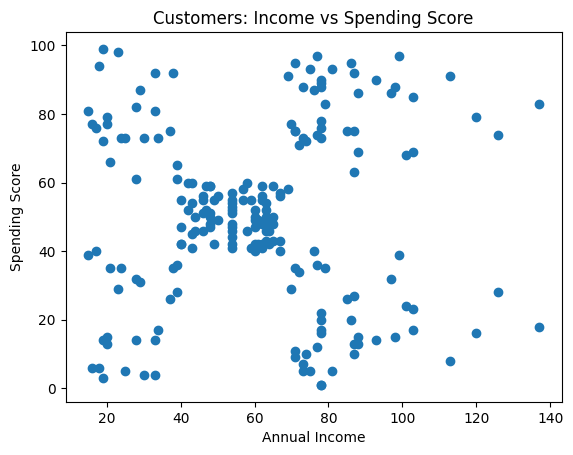

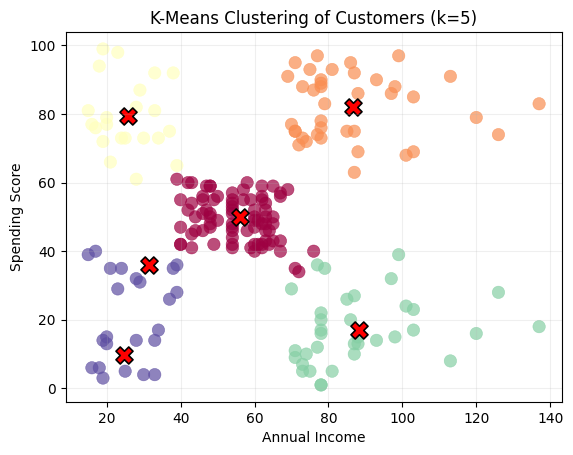

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Load dataset
url = "https://gist.githubusercontent.com/ryanorsinger/cc276eea59e8295204d1f581c8da509f/raw/mall_customers.csv"
df = pd.read_csv(url)

# 2. Display first 5 rows and summary
print(df.head())
print(df.describe())


# 3. Select features
X = df[['annual_income', 'spending_score']]

# 4. Scatter plot of features
plt.scatter(X['annual_income'], X['spending_score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customers: Income vs Spending Score')
plt.show()

# 5. Choose k (students decide)
k = 5

# 6. Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 7. Visualize clusters (sunset colors)
plt.scatter(
    X['annual_income'],
    X['spending_score'],
    c=y_kmeans,
    cmap='Spectral',
    s=80,               # bigger dots for impact
    alpha=0.7,
    linewidth=0.4
)

# Plot centroids
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=150,
    marker='X',
    edgecolor='black',
    linewidth=1.2,
    label='Centroids'
)


# Labels & title
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title(f'K-Means Clustering of Customers (k={k})')

# Add grid for cleaner readability
plt.grid(alpha=0.2)

plt.show()

**Write a short interpretation:**


1. What do the clusters represent?

*The clusters represents the group of customers with similar spending behavior and annual income. Each color in the K-Means plot highlights a different customer group. Basically, the model is grouping customers into meaningful categories based on how much they earn and how much they tend to spend.*

2. Which group are high spenders?

*Using k value at five, I observed that there are two group clusters who are high spenders. This two clusters are __A. Low Annual Income Customers with High Spending__ and __B. High Annual Income with High Spending__. because these clusters are located at the upper-right area of the scatterplot (high income + high spending score).*

3. Are there clear segments?

*Yes, the scatterplot shows clear and separable segments, meaning customers naturally fall into groups—low income & low spenders, high income & high spenders, average income but high spenders, etc. The distances between centroids indicate that the model successfully identified distinct behavior patterns, making segmentation useful.*

## Activity 2 - Assocation Rule Mining

Apply the Apriori algorithm to the following transactions


| TransactionID | Items                          |
| ------------- | ------------------------------ |
| T1            | Notebook, Pen, Water Bottle    |
| T2            | Coffee, Sandwich, Notebook     |
| T3            | Pen, Highlighter, Notebook     |
| T4            | Coffee, Energy Drink, Sandwich |
| T5            | Notebook, Pen, Laptop Sticker  |
| T6            | Coffee, Sandwich, Energy Drink |
| T7            | Pen, Notebook, Coffee          |
| T8            | Laptop Sticker, Notebook, Pen  |
| T9            | Coffee, Pen, Sandwich          |
| T10           | Energy Drink, Notebook, Pen    |



**Your Tasks**

    1. Load the dataset using pandas
    2. Convert to one-hot encoding using TransactionEncoder.
    3. Run Apriori: min_support=0.3
    4. Generate association rules: metric="lift".
    5. Display:
        - Frequent itemsets
        - Rules sorted by confidence
    6. Create at least one visualization:
        - Scatterplot (support vs confidence, lift as size)
    7. Write a short interpretation for the top 3 rules.

Frequent Itemsets:
    support            itemsets
0      0.5            (Coffee)
1      0.3      (Energy Drink)
2      0.7          (Notebook)
3      0.7               (Pen)
4      0.4          (Sandwich)
5      0.4  (Coffee, Sandwich)
6      0.6     (Notebook, Pen)

Association Rules:
   antecedents consequents  support  confidence     lift
1  (Sandwich)    (Coffee)      0.4    1.000000  2.00000
2  (Notebook)       (Pen)      0.6    0.857143  1.22449
3       (Pen)  (Notebook)      0.6    0.857143  1.22449
0    (Coffee)  (Sandwich)      0.4    0.800000  2.00000


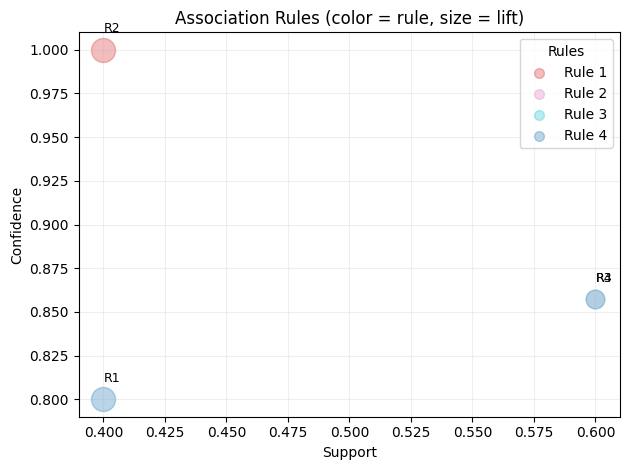

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Student transaction dataset
dataset = [
    ["Notebook", "Pen", "Water Bottle"],             # T1
    ["Coffee", "Sandwich", "Notebook"],              # T2
    ["Pen", "Highlighter", "Notebook"],              # T3
    ["Coffee", "Energy Drink", "Sandwich"],          # T4
    ["Notebook", "Pen", "Laptop Sticker"],           # T5
    ["Coffee", "Sandwich", "Energy Drink"],          # T6
    ["Pen", "Notebook", "Coffee"],                   # T7
    ["Laptop Sticker", "Notebook", "Pen"],           # T8
    ["Coffee", "Pen", "Sandwich"],                   # T9
    ["Energy Drink", "Notebook", "Pen"],             # T10
]

# One-hot encode
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_items = apriori(df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets:\n", frequent_items)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by="confidence", ascending=False)
print("\nAssociation Rules:\n",
      rules[['antecedents','consequents','support','confidence','lift']])

# Create color map with as many colors as rules
colors = plt.cm.tab10(np.linspace(0, 1, len(rules)))

scatter_points = []
for i, row in rules.iterrows():
    sc = plt.scatter(
        row['support'],
        row['confidence'],
        s=row['lift'] * 150,   # bubble size in chart
        color=colors[i],
        alpha=0.3
    )
    scatter_points.append(sc)

    plt.text(
        row['support'],
        row['confidence'] + 0.01,
        f"R{i+1}",
        fontsize=9,
        ha='center'
    )

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules (color = rule, size = lift)')

# Legend with fixed bubble size
handles = []
labels = []

for i, sc in enumerate(scatter_points):
    handles.append(sc)
    labels.append(f"Rule {i+1}")

legend = plt.legend(
    handles,
    labels,
    title="Rules",
    loc='upper right',
    scatterpoints=1
)

handles = legend.legendHandles if hasattr(legend, "legendHandles") else legend.legend_handles
for h in handles:
    h.set_sizes([50])

plt.tight_layout()
plt.grid(alpha=0.2)

plt.show()



# Limitations of Unsupervised Learning

* No ground truth because data has no labels, there is no objective measure of correctness
    "When clustering customers, how do you know if the groups are truly meaningful?"
* Unsupervised methods can produce outputs based on random initialization, parameter choices, scaling of data
    "K-Means with different random seeds produce different clusters"
* Sensitive to hyperparameters, small parameter changes can produce completely different results
* Patterns found may not map to real-world meaning
* Highly affected by outliers, irrelevant features
    "K-Means is very sensitive to outliers because they can pull centroids"
* Computationally expensive for large datasets making them unsuitable without optimization